In [33]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [34]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [35]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [36]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [37]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.5110493985267311, 0.4789720348225359],
 'diameter': 46.45878794336533,
 'confidence': 1.0,
 'timestamp': -890234.24438,
 'sphere': {'center': [7.906826709699715,
   1.3464516113548917,
   37.71630858040398],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [155.102838522778, 106.01660135567856],
  'axes': [186.3873137067647, 186.3873137067647],
  'angle': 0.0},
 'circle_3d': {'center': [0.6955748602211269,
   0.48909102387337544,
   30.282414608438483],
  'normal': [-0.6939030327484416, -0.08249956099583818, -0.7153267809735695],
  'radius': 2.1870807555768415},
 'diameter_3d': 4.374161511153683,
 'ellipse': {'center': [98.12148451713237, 100.0373693140731],
  'axes': [36.319310389264956, 46.45878794336533],
  'angle': 5.998115568727172},
 'location': [98.12148451713237, 100.0373693140731],
 'model_confidence': 1.0,
 'theta': 1.6533897600294327,
 'phi': -2.3409932094652413}

Text(0.5, 0, 'Pupil timestamp (s)')

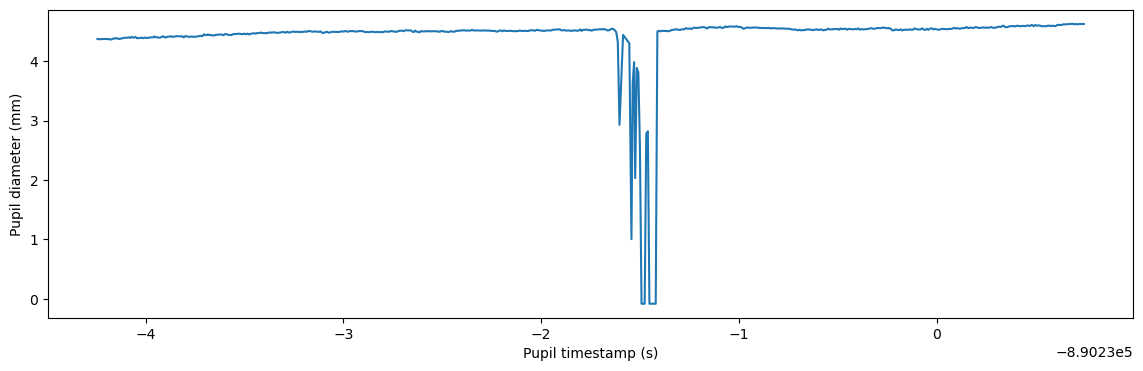

In [38]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')